# Задание 5


## 1. Постоянный шаг. Метод РК (классический 4-х стадийный)

In [1]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
x_0 = 0.994
y_0 = 0
u_0 = 0
v_0 = -2.00158510637908252240537862224
T   = 17.0652165601579625588917206249
mu = 0.012277471
eta = 1 - mu

In [7]:
def A(x, y):
    return sqrt(((x + mu) ** 2 + y ** 2) ** 3)

def B(x, y):
    return sqrt(((x - eta) ** 2 + y ** 2) ** 3)

def f(x, u, y, v):
    return u

def g(x, u, y, v):
    return x + 2 * v - eta * (x + mu) / A(x, y) - mu * (x - eta) / B(x, y)

def h(x, u, y, v):
    return v

def p(x, u, y, v):
    return y - 2 * u - eta * y / A(x, y) - mu * y / B(x, y)

In [55]:
# классический 4-х стадийный метод Рунге-Кутты
def ODE(t_grid, tau, x_0, u_0, y_0, v_0, i_check):
    x_check = []
    u_check = []
    y_check = []
    v_check = []

    x_n = x_0
    u_n = u_0
    y_n = y_0
    v_n = v_0
    for i in range(len(t_grid) - 1):
        # добавляем в точки
        if i % i_check == 0:
            x_check.append(x_n)
            u_check.append(u_n)
            y_check.append(y_n)
            v_check.append(v_n)

        k1 = f(x_n, u_n, y_n, v_n)
        m1 = g(x_n, u_n, y_n, v_n)
        l1 = h(x_n, u_n, y_n, v_n)
        s1 = p(x_n, u_n, y_n, v_n)

        k2 = f(x_n + tau / 2 * k1, u_n + tau / 2 * m1, y_n + tau / 2 * l1, v_n + tau / 2 * s1)
        m2 = g(x_n + tau / 2 * k1, u_n + tau / 2 * m1, y_n + tau / 2 * l1, v_n + tau / 2 * s1)
        l2 = h(x_n + tau / 2 * k1, u_n + tau / 2 * m1, y_n + tau / 2 * l1, v_n + tau / 2 * s1)
        s2 = p(x_n + tau / 2 * k1, u_n + tau / 2 * m1, y_n + tau / 2 * l1, v_n + tau / 2 * s1)

        k3 = f(x_n + tau / 2 * k2, u_n + tau / 2 * m2, y_n + tau / 2 * l2, v_n + tau / 2 * s2)
        m3 = g(x_n + tau / 2 * k2, u_n + tau / 2 * m2, y_n + tau / 2 * l2, v_n + tau / 2 * s2)
        l3 = h(x_n + tau / 2 * k2, u_n + tau / 2 * m2, y_n + tau / 2 * l2, v_n + tau / 2 * s2)
        s3 = p(x_n + tau / 2 * k2, u_n + tau / 2 * m2, y_n + tau / 2 * l2, v_n + tau / 2 * s2)

        k4 = f(x_n + tau * k3, u_n + tau * m3, y_n + tau * l3, v_n + tau * s3)
        m4 = g(x_n + tau * k3, u_n + tau * m3, y_n + tau * l3, v_n + tau * s3)
        l4 = h(x_n + tau * k3, u_n + tau * m3, y_n + tau * l3, v_n + tau * s3)
        s4 = p(x_n + tau * k3, u_n + tau * m3, y_n + tau * l3, v_n + tau * s3)

        # значения в следующей точке
        x_n = x_n + tau / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        u_n = u_n + tau / 6 * (m1 + 2 * m2 + 2 * m3 + m4)
        y_n = y_n + tau / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        v_n = v_n + tau / 6 * (s1 + 2 * s2 + 2 * s3 + s4)
        
    return x_check, u_check, y_check, v_check

In [64]:
T_num = 6
t_start = 0
t_end   = T_num * T

N_degree = 7
N = 10 ** N_degree + 1

i_check_degree = 3
i_check = 10 ** i_check_degree  # каждую 1000-ю точку сохраняем для графика

t_grid, tau = np.linspace(t_start, t_end, N, retstep=True)
x_check, _, y_check, _ = ODE(t_grid, tau, x_0, u_0, y_0, v_0, i_check)


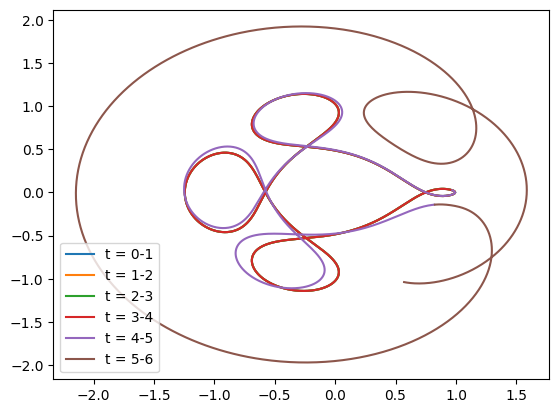

In [65]:
x_check_T = []
y_check_T = []
for i in range(T_num):
    N_start = 10 ** (N_degree - i_check_degree) // T_num * i
    N_end = 10 ** (N_degree - i_check_degree) // T_num * (i + 1)
    x_check_T.append(x_check[N_start:N_end])
    y_check_T.append(y_check[N_start:N_end])
    plt.plot(x_check[N_start:N_end], y_check[N_start:N_end], label=f"t = {i}-{i + 1}")
plt.legend()

**Идеи для улучшения**\
можно задавать количество точек на период, и переписать код так, чтобы ODE возвращала значения в последней точке. Тогда можно посчитать один период, построить график, затем при необходимости продолжить считать соедующий период, задав в качестве начальных значений последние значения, которые были возвращены функцией.Так не будем пересчитывать заново, если хотим посчитать следующий период,

## Переменный шаг. Метод Дормана-Принса 4(5) (руками)

In [ ]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Задаем то, что относится к задаче

In [165]:
x_0 = 0.994
y_0 = 0
u_0 = 0
v_0 = -2.00158510637908252240537862224
T   = 17.0652165601579625588917206249
mu = 0.012277471
eta = 1 - mu

In [166]:
def A(x, y):
    return sqrt(((x + mu) ** 2 + y ** 2) ** 3)

def B(x, y):
    return sqrt(((x - eta) ** 2 + y ** 2) ** 3)

def f(x, u, y, v):
    return u

def g(x, u, y, v):
    return x + 2 * v - eta * (x + mu) / A(x, y) - mu * (x - eta) / B(x, y)

def h(x, u, y, v):
    return v

def p(x, u, y, v):
    return y - 2 * u - eta * y / A(x, y) - mu * y / B(x, y)

Задаем метод Дормана-Принса

In [167]:
c_DP = [0, 1/5, 3/10, 4/5, 8/9, 1, 1]
b1_DP = [35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0]
b2_DP = [5179/57600, 0, 7571/16695, 393/640, -92097/339200, 187/2100, 1/40]
A_DP = [
    [0, 0, 0, 0, 0 , 0, 0],
    [1/5, 0, 0, 0, 0 , 0, 0],
    [3/40, 9/40, 0, 0, 0 , 0, 0],
    [44/45, -56/15, 32/9, 0, 0 , 0, 0],
    [19372/6561, -25360/2187, 64448/6561, -212/729, 0 , 0, 0],
    [9017/3168, -355/33, 46732/5247, 49/176, -5163/18656 , 0, 0],
    [35/384, 0, 500/1113, 125/192, -2187/6784 , 11/84, 0]
]

In [ ]:
def ODE_DP45(t_start, t_end, x_0, u_0, y_0, v_0, i_check, eps, tau_start, beta_max, beta_min, beta):
    # начальный шаг
    tau = tau_start
    t_n = t_start

    x_check = []
    y_check = []

    x_n = x_0
    u_n = u_0
    y_n = y_0
    v_n = v_0
    i = 0
    norma = 0
    while t_n + tau <= t_end:
        # сохраняем точки для отрисовки траектории
        if i % i_check == 0:
            print(t_n, tau, norma)
            x_check.append(x_n)
            # u_check.append(u_n)
            y_check.append(y_n)
            # v_check.append(v_n)

        k1 = f(x_n, u_n, y_n, v_n)
        
        # значения в следующей точке
        x_n1 = x_n
        u_n1 = u_n
        y_n1 = y_n
        v_n1 = v_n
        # для контроля ошибки
        x_n1_err = x_n
        u_n1_err = u_n
        y_n1_err = y_n
        v_n1_err = v_n
        for i1 in range(7):
            x_n1 += tau * b2_DP[i1] * k[i1]
            u_n1 += tau * b2_DP[i1] * m[i1]
            y_n1 += tau * b2_DP[i1] * l[i1]
            v_n1 += tau * b2_DP[i1] * s[i1]

            x_n1_err += tau * b1_DP[i1] * k[i1]
            u_n1_err += tau * b1_DP[i1] * m[i1]
            y_n1_err += tau * b1_DP[i1] * l[i1]
            v_n1_err += tau * b1_DP[i1] * s[i1]
        
        # # контроль шага
        # norma = max(
        #     abs(x_n1 - x_n1_err),
        #     abs(u_n1 - u_n1_err),
        #     abs(y_n1 - y_n1_err),
        #     abs(v_n1 - v_n1_err)
        # )
        # if norma > eps or norma < eps / 2:
        #     # меняем шаг и пересчитываем следующую точку
        #     # tau = beta * tau * (eps / norma) ** (1 / 5)
        #     tau = tau * min(beta_max, max(beta_min, beta * (eps / norma) ** (1 / 5)))
        # else:
        #     # переход на следующий шаг по времени
        x_n = x_n1
        u_n = u_n1
        y_n = y_n1
        v_n = v_n1
        t_n += tau
        i += 1
        
    return (t_n, x_n, u_n, y_n, v_n), x_check, y_check

In [ ]:
t_start = 0
t_end   = 1 * T
tau_start = 1e-6
eps = 1e-4
beta_max = 2
beta_min = 0.5
beta     = 0.8
i_check = 1000

last_point, x_check, y_check = ODE_DP45(t_start, t_end, x_0, u_0, y_0, v_0, i_check, eps, tau_start, beta_max, beta_min, beta)

0 1e-06 0
0.0010000000000000152 1e-06 0
0.001999999999999941 1e-06 0
0.003000000000000074 1e-06 0
0.0040000000000002065 1e-06 0
0.005000000000000339 1e-06 0
0.006000000000000472 1e-06 0
0.007000000000000605 1e-06 0
0.008000000000000574 1e-06 0
0.00899999999999984 1e-06 0
0.009999999999999105 1e-06 0
0.01099999999999837 1e-06 0
0.011999999999997636 1e-06 0
0.012999999999996901 1e-06 0
0.013999999999996167 1e-06 0
0.014999999999995432 1e-06 0
0.015999999999995348 1e-06 0
0.016999999999996348 1e-06 0
0.017999999999997348 1e-06 0
0.018999999999998348 1e-06 0
0.019999999999999348 1e-06 0
0.021000000000000348 1e-06 0
0.02200000000000135 1e-06 0
0.02300000000000235 1e-06 0
0.02400000000000335 1e-06 0
0.02500000000000435 1e-06 0
0.02600000000000535 1e-06 0
0.02700000000000635 1e-06 0
0.02800000000000735 1e-06 0
0.02900000000000835 1e-06 0
0.03000000000000935 1e-06 0
0.03100000000001035 1e-06 0
0.032000000000011346 1e-06 0
0.033000000000012346 1e-06 0
0.034000000000013346 1e-06 0
0.035000000000

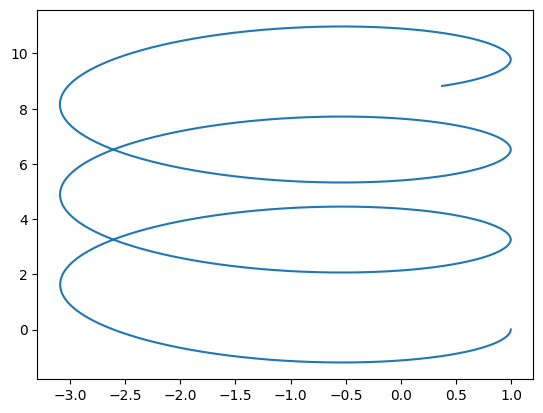

In [ ]:
plt.plot(x_check, y_check)

## 2. Переменный шаг. Метод Дормана-Принса 4(5)

In [1]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Задаем то, что относится к задаче

In [187]:
x_0 = 0.994
y_0 = 0
u_0 = 0
v_0 = -2.00158510637908252240537862224
T   = 17.0652165601579625588917206249
mu = 0.012277471
eta = 1 - mu

In [188]:
def A(x, y):
    return sqrt(((x + mu) ** 2 + y ** 2) ** 3)

def B(x, y):
    return sqrt(((x - eta) ** 2 + y ** 2) ** 3)

def f(t, x, u, y, v):
    return u

def g(t, x, u, y, v):
    return x + 2 * v - eta * (x + mu) / A(x, y) - mu * (x - eta) / B(x, y)

def h(t, x, u, y, v):
    return v

def p(t, x, u, y, v):
    return y - 2 * u - eta * y / A(x, y) - mu * y / B(x, y)

Задаем метод Дормана-Принса

In [189]:
c_DP = [0, 1/5, 3/10, 4/5, 8/9, 1, 1]
b1_DP = [35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0]
b2_DP = [5179/57600, 0, 7571/16695, 393/640, -92097/339200, 187/2100, 1/40]
A_DP = [
    [0, 0, 0, 0, 0 , 0, 0],
    [1/5, 0, 0, 0, 0 , 0, 0],
    [3/40, 9/40, 0, 0, 0 , 0, 0],
    [44/45, -56/15, 32/9, 0, 0 , 0, 0],
    [19372/6561, -25360/2187, 64448/6561, -212/729, 0 , 0, 0],
    [9017/3168, -355/33, 46732/5247, 49/176, -5163/18656 , 0, 0],
    [35/384, 0, 500/1113, 125/192, -2187/6784 , 11/84, 0]
]

In [214]:
def ODE_DP45(t_start, t_end, x_0, u_0, y_0, v_0, i_check, eps, tau_start, beta_max, beta_min, beta):
    # начальный шаг
    tau = tau_start
    t_n = t_start

    x_check = []
    u_check = []
    y_check = []
    v_check = []

    x_n = x_0
    u_n = u_0
    y_n = y_0
    v_n = v_0
    i = 0
    norma = 0
    while t_n + tau <= t_end:
        # сохраняем точки для отрисовки траектории
        if i % i_check == 0:
            print(t_n, tau, norma)
            x_check.append(x_n)
            # u_check.append(u_n)
            y_check.append(y_n)
            # v_check.append(v_n)

        k = [None] * 7
        m = [None] * 7
        l = [None] * 7
        s = [None] * 7
        for i1 in range(7):
            t_i = t_n + c_DP[i1] * tau
            x_i = x_n
            u_i = u_n
            y_i = y_n
            v_i = v_n
            for j in range(i1):
                x_i += k[j] * A_DP[i1][j] * tau
                u_i += m[j] * A_DP[i1][j] * tau
                y_i += l[j] * A_DP[i1][j] * tau
                v_i += s[j] * A_DP[i1][j] * tau
            k[i1] = f(t_i, x_i, u_i, y_i, v_i)
            m[i1] = g(t_i, x_i, u_i, y_i, v_i)
            l[i1] = h(t_i, x_i, u_i, y_i, v_i)
            s[i1] = p(t_i, x_i, u_i, y_i, v_i)
        
        # значения в следующей точке
        x_n1 = x_n
        u_n1 = u_n
        y_n1 = y_n
        v_n1 = v_n
        # для контроля ошибки
        x_n1_err = x_n
        u_n1_err = u_n
        y_n1_err = y_n
        v_n1_err = v_n
        for i1 in range(7):
            x_n1 += tau * b2_DP[i1] * k[i1]
            u_n1 += tau * b2_DP[i1] * m[i1]
            y_n1 += tau * b2_DP[i1] * l[i1]
            v_n1 += tau * b2_DP[i1] * s[i1]

            x_n1_err += tau * b1_DP[i1] * k[i1]
            u_n1_err += tau * b1_DP[i1] * m[i1]
            y_n1_err += tau * b1_DP[i1] * l[i1]
            v_n1_err += tau * b1_DP[i1] * s[i1]
        
        # контроль шага
        norma = abs(x_n1 - x_n1_err) + abs(u_n1 - u_n1_err) + abs(y_n1 - y_n1_err) + abs(v_n1 - v_n1_err)
        if norma > eps or norma < eps / 2:
            # меняем шаг и пересчитываем следующую точку
            # tau = beta * tau * (eps / norma) ** (1 / 5)
            tau = tau * min(beta_max, max(beta_min, beta * (eps / norma) ** (1 / 5)))
        else:
            # переход на следующий шаг по времени
            x_n = x_n1
            u_n = u_n1
            y_n = y_n1
            v_n = v_n1
            t_n += tau
            i += 1
        
    return (t_n, x_n, u_n, y_n, v_n), x_check, y_check

In [249]:
t_start = 0
t_end   = 4 * T
tau_start = 1e-4
eps = 1e-13
beta_max = 1.1
beta_min = 0.01
beta     = 0.9
i_check = 1000

last_point, x_check, y_check = ODE_DP45(t_start, t_end, x_0, u_0, y_0, v_0, i_check, eps, tau_start, beta_max, beta_min, beta)

0 0.0001 0
0 5.277801751552333e-06 1.441939977072119e-07
0 9.14593566947764e-07 3.778654639399482e-10
0 3.197108621760295e-07 1.1312700785250484e-11
0 1.7015736028971445e-07 1.3827568151872827e-12
0 1.1657847468073362e-07 3.9117798178117213e-13
0 9.286560468286848e-08 1.8408988904790111e-13
0 8.106896114852613e-08 1.1646996976943062e-13
8.106896114852496e-05 8.106896114852613e-08 9.274549986511282e-14
0.0001621379222970516 8.106896114852613e-08 9.652744098823107e-14
0.00023980791814485564 7.295687212531864e-08 8.163234628197347e-14
0.00031276479027016847 7.295687212531864e-08 8.420488698673845e-14
0.0003857216623954813 7.295687212531864e-08 8.704094302952603e-14
0.0004586785345207941 7.295687212531864e-08 8.882250403935421e-14
0.000531635406646107 7.295687212531864e-08 9.024291730552747e-14
0.0006045922787714198 7.295687212531864e-08 9.210687768046455e-14
0.0006775491508967327 7.295687212531864e-08 9.291677670331122e-14
0.0007505060230220455 7.295687212531864e-08 9.389299233941717e-14


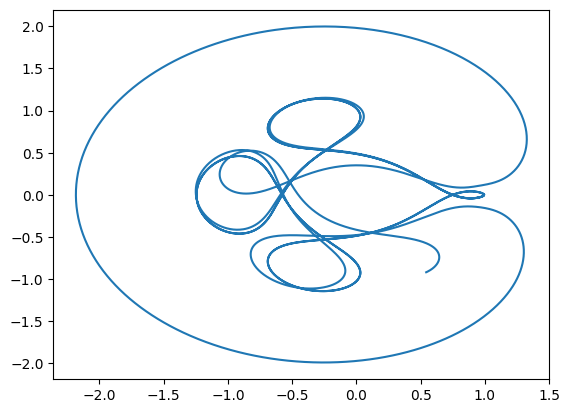

In [250]:
plt.plot(x_check, y_check)

## Метод Рунге-Кутты (счет коэффициентов через массив)

In [101]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
x_0 = 0.994
y_0 = 0
u_0 = 0
v_0 = -2.00158510637908252240537862224
T   = 17.0652165601579625588917206249
mu = 0.012277471
eta = 1 - mu

In [175]:
def A(x, y):
    return sqrt(((x + mu) ** 2 + y ** 2) ** 3)

def B(x, y):
    return sqrt(((x - eta) ** 2 + y ** 2) ** 3)

def f(x, u, y, v):
    return u

def g(x, u, y, v):
    return x + 2 * v - eta * (x + mu) / A(x, y) - mu * (x - eta) / B(x, y)

def h(x, u, y, v):
    return v

def p(x, u, y, v):
    return y - 2 * u - eta * y / A(x, y) - mu * y / B(x, y)

In [176]:
c_RK = [0, 1/2, 1/2, 1]
b_RK = [1/6, 1/3, 1/3, 1/6]
A_RK = [
    [0, 0, 0, 0],
    [1/2, 0, 0, 0],
    [0, 1/2, 0, 0],
    [0, 0, 1, 0]
]

In [177]:
def ODE_RK4(t_start, t_end, x_0, u_0, y_0, v_0, i_check, tau_start):
    # начальный шаг
    tau = tau_start
    t_n = t_start

    x_check = []
    y_check = []

    x_n = x_0
    u_n = u_0
    y_n = y_0
    v_n = v_0
    counter = 0
    while t_n + tau <= t_end:
        # сохраняем точки для отрисовки траектории
        if counter % i_check == 0:
            print(t_n)
            x_check.append(x_n)
            y_check.append(y_n)

        k = [None] * 4
        m = [None] * 4
        l = [None] * 4
        s = [None] * 4
        for i in range(4):
            x_i = x_n
            u_i = u_n
            y_i = y_n
            v_i = v_n
            for j in range(i):
                x_i += k[j] * A_RK[i][j] * tau
                u_i += m[j] * A_RK[i][j] * tau
                y_i += l[j] * A_RK[i][j] * tau
                v_i += s[j] * A_RK[i][j] * tau
            k[i] = f(x_i, u_i, y_i, v_i)
            m[i] = g(x_i, u_i, y_i, v_i)
            l[i] = h(x_i, u_i, y_i, v_i)
            s[i] = p(x_i, u_i, y_i, v_i)
        
        # значения в следующей точке
        x_n1 = x_n
        u_n1 = u_n
        y_n1 = y_n
        v_n1 = v_n

        for i in range(4):
            x_n1 += tau * b_RK[i] * k[i]
            u_n1 += tau * b_RK[i] * m[i]
            y_n1 += tau * b_RK[i] * l[i]
            v_n1 += tau * b_RK[i] * s[i]

        x_n = x_n1
        u_n = u_n1
        y_n = y_n1
        v_n = v_n1
        t_n += tau
        counter += 1
        
    return (t_n, x_n, u_n, y_n, v_n), x_check, y_check

In [178]:
t_start = 0
t_end = T
i_check = 1000
tau_start = 1e-4
last_point, x_check, y_check = ODE_RK4(t_start, t_end, x_0, u_0, y_0, v_0, i_check, tau_start)

0
0.10000000000000184
0.1999999999999943
0.2999999999999833
0.39999999999997227
0.49999999999996125
0.5999999999999502
0.6999999999999392


0.7999999999999282
0.8999999999999172
0.9999999999999062
1.0999999999998953
1.1999999999998843
1.2999999999998733
1.3999999999998622
1.4999999999998512
1.5999999999998402
1.6999999999998292
1.7999999999998182
1.8999999999998072
1.9999999999997962
2.100000000000007
2.2000000000002182
2.3000000000004293
2.4000000000006403
2.5000000000008513
2.6000000000010624
2.7000000000012734
2.8000000000014844
2.9000000000016954
3.0000000000019065
3.1000000000021175
3.2000000000023285
3.3000000000025396
3.4000000000027506
3.5000000000029616
3.6000000000031727
3.7000000000033837
3.8000000000035947
3.9000000000038058
4.000000000004016
4.100000000003783
4.20000000000355
4.300000000003317
4.400000000003084
4.500000000002851
4.600000000002618
4.700000000002385
4.800000000002152
4.900000000001919
5.000000000001686
5.100000000001453
5.20000000000122
5.300000000000987
5.4000000000007535
5.5000000000005205
5.600000000000287
5.700000000000054
5.799999999999821
5.899999999999588
5.999999999999355
6.0999999999991

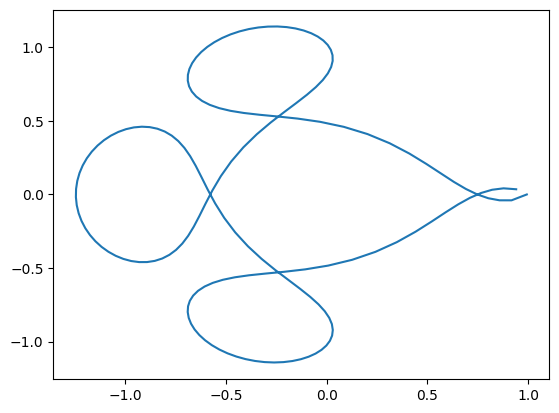

In [179]:
plt.plot(x_check, y_check)

## Постоянный шаг. Метод РК (классический 4-х стадийный)

In [127]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
x_0 = 0.994
y_0 = 0
u_0 = 0
v_0 = -2.00158510637908252240537862224
T   = 17.0652165601579625588917206249
mu = 0.012277471
eta = 1 - mu

In [129]:
def A(x, y):
    return sqrt(((x + mu) ** 2 + y ** 2) ** 3)

def B(x, y):
    return sqrt(((x - eta) ** 2 + y ** 2) ** 3)

def f(x, u, y, v):
    return u

def g(x, u, y, v):
    return x + 2 * v - eta * (x + mu) / A(x, y) - mu * (x - eta) / B(x, y)

def h(x, u, y, v):
    return v

def p(x, u, y, v):
    return y - 2 * u - eta * y / A(x, y) - mu * y / B(x, y)

In [130]:
# классический 4-х стадийный метод Рунге-Кутты
def ODE(t_grid, tau, x_0, u_0, y_0, v_0, i_check):
    x_check = []
    u_check = []
    y_check = []
    v_check = []

    x_n = x_0
    u_n = u_0
    y_n = y_0
    v_n = v_0
    for i in range(len(t_grid) - 1):
        # добавляем в точки
        if i % i_check == 0:
            x_check.append(x_n)
            u_check.append(u_n)
            y_check.append(y_n)
            v_check.append(v_n)

        k1 = f(x_n, u_n, y_n, v_n)
        m1 = g(x_n, u_n, y_n, v_n)
        l1 = h(x_n, u_n, y_n, v_n)
        s1 = p(x_n, u_n, y_n, v_n)

        k2 = f(x_n + tau / 2 * k1, u_n + tau / 2 * m1, y_n + tau / 2 * l1, v_n + tau / 2 * s1)
        m2 = g(x_n + tau / 2 * k1, u_n + tau / 2 * m1, y_n + tau / 2 * l1, v_n + tau / 2 * s1)
        l2 = h(x_n + tau / 2 * k1, u_n + tau / 2 * m1, y_n + tau / 2 * l1, v_n + tau / 2 * s1)
        s2 = p(x_n + tau / 2 * k1, u_n + tau / 2 * m1, y_n + tau / 2 * l1, v_n + tau / 2 * s1)

        k3 = f(x_n + tau / 2 * k2, u_n + tau / 2 * m2, y_n + tau / 2 * l2, v_n + tau / 2 * s2)
        m3 = g(x_n + tau / 2 * k2, u_n + tau / 2 * m2, y_n + tau / 2 * l2, v_n + tau / 2 * s2)
        l3 = h(x_n + tau / 2 * k2, u_n + tau / 2 * m2, y_n + tau / 2 * l2, v_n + tau / 2 * s2)
        s3 = p(x_n + tau / 2 * k2, u_n + tau / 2 * m2, y_n + tau / 2 * l2, v_n + tau / 2 * s2)

        k4 = f(x_n + tau * k3, u_n + tau * m3, y_n + tau * l3, v_n + tau * s3)
        m4 = g(x_n + tau * k3, u_n + tau * m3, y_n + tau * l3, v_n + tau * s3)
        l4 = h(x_n + tau * k3, u_n + tau * m3, y_n + tau * l3, v_n + tau * s3)
        s4 = p(x_n + tau * k3, u_n + tau * m3, y_n + tau * l3, v_n + tau * s3)

        # значения в следующей точке
        x_n = x_n + tau / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        u_n = u_n + tau / 6 * (m1 + 2 * m2 + 2 * m3 + m4)
        y_n = y_n + tau / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        v_n = v_n + tau / 6 * (s1 + 2 * s2 + 2 * s3 + s4)
        
    return x_check, u_check, y_check, v_check

In [139]:
t_start = 0
t_end   = 1 * T

i_check = 1000  # каждую 1000-ю точку сохраняем для графика

tau = 1e-3
t_grid = np.arange(t_start, t_end, tau)
x_check, _, y_check, _ = ODE(t_grid, tau, x_0, u_0, y_0, v_0, i_check)


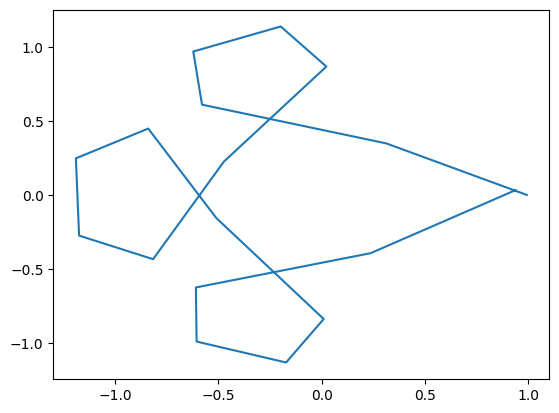

In [140]:
plt.plot(x_check, y_check)